In [1]:
# flatten 4d (lat, lon, date, level) output data to 2d (record, level)

In [2]:
import numpy as np
import xarray as xr
import re

In [3]:
# Name of input Netcdf file
input_directory = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-2018-03/nd51/'
output_directory = input_directory

name_nc_in = 'ts_satellite.201801-03.nc'

input_file = input_directory + name_nc_in

# Name of output netCDF file
output_file = output_directory + '2d_' + name_nc_in

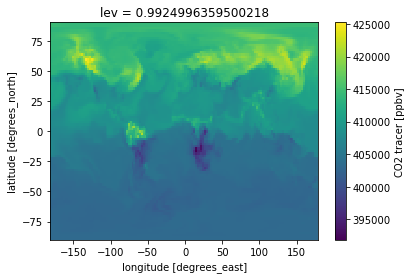

In [4]:
ds = xr.open_dataset(input_file)
ds = ds.squeeze('time') # remove unnecessay dimension
ds = ds.drop('time')
ds = ds.isel(record=slice(59,90)) # last month
ds['SpeciesConc_CO2'][30,0,:,:].plot()

In [5]:
first_day = '2018-03-01'
last_day_p1 = '2018-04-01'
days = np.arange(first_day, last_day_p1, dtype='datetime64[D]')
ds.coords['record'] = days 
ds = ds.rename({'record':'date'}) # rename and add coordinates
ds

<xarray.Dataset>
Dimensions:               (date: 31, lat: 91, lev: 47, lon: 144)
Coordinates:
  * lev                   (lev) float64 0.9925 0.9775 ... 0.000127 2.763e-05
  * lon                   (lon) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * lat                   (lat) float64 -89.5 -88.0 -86.0 ... 86.0 88.0 89.5
  * date                  (date) datetime64[ns] 2018-03-01 ... 2018-03-31
Data variables:
    SpeciesConc_CO2oc     (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2bf     (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2ff     (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2       (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag1   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag2   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag3   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag4   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag5   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag6   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag7   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag8   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag9   (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag10  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag11  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag12  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag13  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag14  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag15  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag16  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag17  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag18  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag19  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag20  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag21  (date, lev, lat, lon) float32 ...
    SpeciesConc_CO2Tag22  (date, lev, lat, lon) float32 ...
    PEDGE_S_PSURF         (date, lev, lat, lon) float32 ...
Attributes:
    modelname:                 GEOSFP_47L
    halfpolar:                 1
    center180:                 1
    res:                       [2.5 2. ]
    Conventions:               CF1.6
    source:                    /geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_ru...
    tracerinfo:                /geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_ru...
    diaginfo:                  /geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_ru...
    filetype:                  CTM bin 02
    filetitle:                 GEOS-CHEM DIAG51 time series
    history:                   Fri Feb  7 12:23:49 2020: ncecat ts_satellite....
    title:                     Created by bpch2nc.py
    conventions:               COARDS
    references:                www.geos-chem.org; wiki.geos-chem.org
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [6]:
varnames = list(ds.data_vars.keys())  # Get a list of variable names. The expression is a bit cumbersome. Just copy and paste it for now.
nvar = len(varnames)  # how many elements in the list?
varnames[0:27]

['SpeciesConc_CO2oc',
 'SpeciesConc_CO2bf',
 'SpeciesConc_CO2ff',
 'SpeciesConc_CO2',
 'SpeciesConc_CO2Tag1',
 'SpeciesConc_CO2Tag2',
 'SpeciesConc_CO2Tag3',
 'SpeciesConc_CO2Tag4',
 'SpeciesConc_CO2Tag5',
 'SpeciesConc_CO2Tag6',
 'SpeciesConc_CO2Tag7',
 'SpeciesConc_CO2Tag8',
 'SpeciesConc_CO2Tag9',
 'SpeciesConc_CO2Tag10',
 'SpeciesConc_CO2Tag11',
 'SpeciesConc_CO2Tag12',
 'SpeciesConc_CO2Tag13',
 'SpeciesConc_CO2Tag14',
 'SpeciesConc_CO2Tag15',
 'SpeciesConc_CO2Tag16',
 'SpeciesConc_CO2Tag17',
 'SpeciesConc_CO2Tag18',
 'SpeciesConc_CO2Tag19',
 'SpeciesConc_CO2Tag20',
 'SpeciesConc_CO2Tag21',
 'SpeciesConc_CO2Tag22',
 'PEDGE_S_PSURF']

In [7]:
nm_lev = len(ds.coords['lev'])
nm_lon = len(ds.coords['lon'])
nm_lat = len(ds.coords['lat'])
nm_days = len(ds.coords['date'])

record = range(nm_lon * nm_lat * nm_days)

In [8]:
foo = xr.DataArray(0, coords=[record, ds.coords['lev']], dims=['record', 'levels'])
foo = foo.astype(dtype = 'float32')
ds_output = foo.to_dataset(name = 'SpeciesConc_CO2')
ds_output = ds_output.astype(dtype = 'float32')
# dataset to store following dataarrays

In [12]:
flat = ds['SpeciesConc_CO2'][:,0,:,:].to_dataframe() # flatten a variable at one level
flat.reset_index(inplace=True) # get indices to prepare output coordinates
flat

,date,lat,lon,lev,SpeciesConc_CO2
0,2018-03-01,-89.5,-180.0,0.9925,403494.53125
1,2018-03-01,-89.5,-177.5,0.9925,403491.37500
2,2018-03-01,-89.5,-175.0,0.9925,403487.75000
3,2018-03-01,-89.5,-172.5,0.9925,403485.18750
4,2018-03-01,-89.5,-170.0,0.9925,403482.12500
...,...,...,...,...,...
406219,2018-03-31,89.5,167.5,0.9925,414677.71875
406220,2018-03-31,89.5,170.0,0.9925,414684.15625
406221,2018-03-31,89.5,172.5,0.9925,414686.09375
406222,2018-03-31,89.5,175.0,0.9925,414690.12500


In [10]:
lat = xr.DataArray(0, coords=[record], dims=['record'])
lon = xr.DataArray(0, coords=[record], dims=['record'])
date = xr.DataArray(0, coords=[record], dims=['record'])
lat.values = flat['lat']
lon.values = flat['lon']
date.values = flat['date']
ds_output['lat'] = lat
ds_output['lon'] = lon
ds_output['date'] = date
ds_output

<xarray.Dataset>
Dimensions:          (levels: 47, record: 406224)
Coordinates:
  * record           (record) int64 0 1 2 3 4 ... 406220 406221 406222 406223
  * levels           (levels) float64 0.9925 0.9775 ... 0.000127 2.763e-05
Data variables:
    SpeciesConc_CO2  (record, levels) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lat              (record) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5
    lon              (record) float64 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    date             (record) datetime64[ns] 2018-03-01 ... 2018-03-31

In [11]:
for ivar in varnames[0:27]:
    for ilev in range(nm_lev):
        flat = ds[ivar][:,ilev,:,:].to_dataframe() # flatten a variable at one level
        foo[:,ilev] = flat[ivar] # store output to a dataarray
    ds_output[ivar] = foo.copy() # store dataarray to dataset

KeyboardInterrupt: 

In [ ]:
ds_output['SpeciesConc_CO2Tag15'][:,0].plot()

In [ ]:
#ds_output.SpeciesConc_CO2Tag10.plot()
ds_output.attrs['comment'] = '[CO2] unit: ppbv'
ds_output.attrs

In [ ]:
ds_output.to_netcdf(path=output_file)